## COVID Daily casualties Analysis Table and Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 
   
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [3]:
!pip install pandas
!pip install tabulate
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.8 MB/s eta 0:00:01    |███████▋                        | 2.4 MB 3.8 MB/s eta 0:00:02
     |████████████████████████████████| 20.2 MB 30 kB/s s eta 0:00:01
     |████████████████████████████████| 509 kB 11.1 MB/s eta 0:00:01
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [1]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0    906      0 --:--:-- --:--:-- --:--:--   910
100 41343  100 41343    0     0   106k      0 --:--:-- --:--:-- --:--:--  734k


In [101]:
 ! egrep -e '[,1-9][1-9][0-9][0-9]$' -e ',[5-9][0-9]$'  -e ^Provi  tim*dea*csv > over50.csv

import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [105]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country/Region,,,,,,,,,,,,,
Austria,1,3,3,4,6,6,8,16,21,28,30,49,58
Belgium,4,5,10,14,21,37,67,75,88,122,178,220,289
Brazil,0,0,1,3,6,11,15,25,34,46,59,77,92
China,3085,3099,3111,3122,3130,3133,3139,3153,3153,3160,3163,3169,3174
Denmark,2,3,4,4,6,9,13,13,24,32,34,41,52
France,91,148,148,148,243,450,562,674,860,1100,1331,1696,1995
Germany,11,17,24,28,44,67,84,94,123,157,206,267,342
Indonesia,5,5,5,19,25,32,38,48,49,55,58,78,87
Iran,724,853,988,1135,1284,1433,1556,1685,1812,1934,2077,2234,2378


In [118]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily casualties 
  #### In-Order by 28March : Italy Spain US France UK Iran Netherlands 
   

In [119]:
df0.pop('3/15/20')
display(df0.sort_values(by=[df.columns[-1]],ascending=False).head(10)) 

,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country/Region,,,,,,,,,,,,
Italy,349,345,475,427,627,793,651,601,743,683,712,919
Spain,53,191,90,207,213,332,397,539,497,839,718,773
US,22,23,10,82,44,63,110,140,149,236,267,372
France,57,0,0,95,207,112,112,186,240,231,365,299
United Kingdom,34,0,16,66,40,56,48,54,87,43,113,181
Iran,129,135,147,149,149,123,129,127,122,143,157,144
Netherlands,4,19,15,18,30,30,43,34,63,80,78,112
Germany,6,7,4,16,23,17,10,29,34,49,61,75
Belgium,1,5,4,7,16,30,8,13,34,56,42,69


In [84]:
#dfr  dfr.insert(loc=0,column='cc',value=df['Country/Region']), index
for index, row in df0.iterrows():
    average = (row[-1]+row[-2]+row[-3]+row[-4]+row[-5])/5
    # print(row[0], 'average of last 5days', average , 'casualties/day')

In [111]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Austria,Belgium,Brazil,China,Denmark,France,Germany,Indonesia,Iran,Italy,"Korea, South",Netherlands,Philippines,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/16/20,2,1,0,14,1,57,6,0,129,349,0,4,1,0,53,3,0,0,34,22
3/17/20,0,5,1,12,1,0,7,0,135,345,6,19,0,1,191,1,13,1,0,23
3/18/20,1,4,2,11,0,0,4,14,147,475,3,15,7,1,90,3,1,0,16,10
3/19/20,2,7,3,8,2,95,16,6,149,427,7,18,-2,1,207,1,13,2,66,82
3/20/20,0,16,5,3,3,207,23,7,149,627,3,30,1,3,213,5,13,1,40,44
3/21/20,2,30,4,6,4,112,17,6,123,793,8,30,1,6,332,4,21,5,56,63
3/22/20,8,8,10,14,0,112,10,10,129,651,9,43,6,2,397,1,23,21,48,110
3/23/20,5,13,9,0,11,186,29,1,127,601,0,34,8,9,539,4,22,7,54,140
3/24/20,7,34,12,7,8,240,34,6,122,743,9,63,2,10,497,11,2,7,87,149
3/25/20,2,56,13,3,2,231,49,3,143,683,6,80,3,10,839,26,31,15,43,236


In [113]:
!pip install seaborn  

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 215 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 10.0 MB/s eta 0:00:01    |███▉                            | 1.5 MB 10.0 MB/s eta 0:00:02     |███████████████████████         | 8.9 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 136 kB/s  eta 0:00:01
     |████████████████████████████████| 90 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.5 MB/s  eta 0:00:01


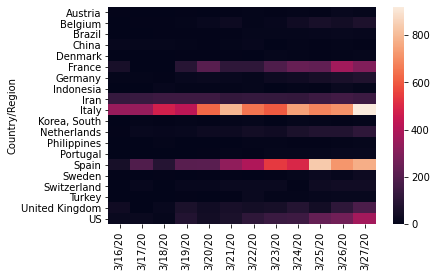

In [116]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

## Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 